# generate word clouds to see frequent words/topics to determine stop words

In [35]:
import nltk
import json
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
from collections import defaultdict
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [36]:
tokenizer = RegexpTokenizer(r'\w+')

In [45]:
stop_words = set(stopwords.words('english'))

# words used in the filter
filterWords = {"tesla", "elon", "musk", "elonmusk", "tsla", "roadster", "supercharger", "powerwall", "powerpack", "modely",
               "model3", "modelx", "teslamodely", "teslamodels", "teslamodel3", "teslamodelx", "spacex",
               "teslasuv", "teslascience"}

# bigrams used in the filter
filterBigrams = {("model", "y"), ("model", "s"), ("model", "3"), ("model", "x"), ("electric", "vehicle"),
                 ("electric", "car"), ("electric", "suv"), ("electric", "supercar")}

# stop words found using the word cloud (manual extraction)
cloud = {'year', 'amp', 'us'}

# add filter words to the stop words
for word in filterWords:
    stop_words.add(word)
    
# add filter bigrams to the stop words
for bi1, bi2 in filterBigrams:
    stop_words.add(bi1)
    stop_words.add(bi2)
    
# add cloud to the stop words
for word in cloud:
    stop_words.add(word)

counts = defaultdict(int)

handle = open('classify.json', encoding='utf8')

for line in handle:
    item = json.loads(line)
    tokens = tokenizer.tokenize(item['text'].lower())
    for token in tokens:
        if token not in stop_words:
            counts[token] += 1
        
handle.close()

In [46]:
wc = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wc.generate_from_frequencies(counts)

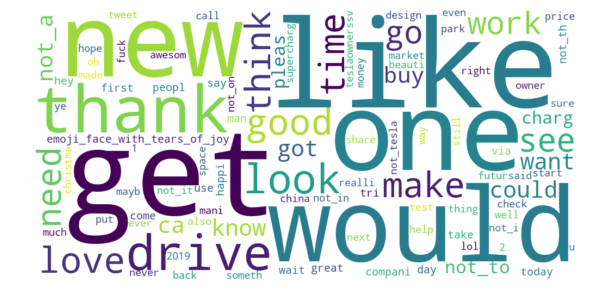

In [47]:
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
# print the most common words
counts2 = []
for i, j in counts.items():
    counts2.append((i,j))
counts2.sort(key=lambda x:x[1], reverse=True)
for i in counts2:
    print(i)

('like', 118)
('get', 114)
('one', 93)
('would', 84)
('new', 81)
('thank', 69)
('drive', 66)
('look', 64)
('good', 64)
('love', 64)
('make', 61)
('think', 61)
('time', 61)
('need', 55)
('see', 52)
('go', 51)
('work', 49)
('could', 49)
('got', 49)
('know', 48)
('want', 47)
('ca', 46)
('not_a', 44)
('buy', 44)
('not_to', 44)
('pleas', 43)
('charg', 41)
('emoji_face_with_tears_of_joy', 41)
('use', 41)
('day', 40)
('via', 40)
('first', 39)
('not_th', 38)
('great', 38)
('take', 38)
('peopl', 37)
('today', 37)
('happi', 36)
('hey', 36)
('tri', 36)
('come', 35)
('say', 35)
('man', 34)
('wait', 34)
('compani', 33)
('never', 31)
('also', 31)
('well', 31)
('right', 30)
('realli', 30)
('owner', 30)
('back', 30)
('much', 30)
('not_tesla', 30)
('design', 29)
('2', 29)
('still', 29)
('next', 28)
('way', 28)
('2019', 28)
('test', 27)
('awesom', 27)
('market', 26)
('not_it', 26)
('check', 26)
('thing', 26)
('not_i', 26)
('help', 26)
('space', 25)
('1', 25)
('not_in', 25)
('start', 24)
('someth', 24)
(

('independ', 3)
('camp', 3)
('stole', 3)
('raptor', 3)
('emoji_robot_fac', 3)
('emoji_high_voltag', 3)
('odd', 3)
('wont', 3)
('lawsuit', 3)
('not_worth', 3)
('flame', 3)
('thrower', 3)
('nasa', 3)
('flamethrow', 3)
('killer', 3)
('spaceship', 3)
('divorc', 3)
('audi', 3)
('emoji_christmas_tre', 3)
('polic', 3)
('elec', 3)
('emoji_face_screaming_in_fear', 3)
('buyer', 3)
('item', 3)
('smoke', 3)
('nation', 3)
('straight', 3)
('citizen', 3)
('not_forget', 3)
('not_mad', 3)
('not_her', 3)
('thnx', 3)
('environment', 3)
('addit', 3)
('ces2019', 3)
('exchang', 3)
('debat', 3)
('not_problem', 3)
('exactli', 3)
('not_thos', 3)
('loui', 3)
('not_real', 3)
('ill', 3)
('safest', 3)
('dumb', 3)
('environ', 3)
('somebodi', 3)
('60', 3)
('terribl', 3)
('meant', 3)
('dc', 3)
('fast', 3)
('longer', 3)
('wife', 3)
('beat', 3)
('remark', 3)
('earn', 3)
('emoji_clinking_glass', 3)
('africa', 3)
('uniqu', 3)
('increas', 3)
('blue', 3)
('grime', 3)
('rate', 3)
('question', 3)
('yall', 3)
('consum', 3)
('

('emoji_batteri', 2)
('emoji_seedl', 2)
('interview', 2)
('matter', 2)
('7kw', 1)
('spaceflight', 1)
('constant', 1)
('egyptian', 1)
('blush', 1)
('vintag', 1)
('tux', 1)
('dilling', 1)
('tuck', 1)
('angel', 1)
('silk', 1)
('hayden', 1)
('weight', 1)
('tinder', 1)
('catalyst', 1)
('script', 1)
('downsiz', 1)
('dang', 1)
('autocorrect', 1)
('not_whos', 1)
('not_phon', 1)
('not_word', 1)
('frequent', 1)
('benefit', 1)
('livin', 1)
('jist', 1)
('autopark', 1)
('brilliantli', 1)
('128', 1)
('attack', 1)
('dumbass', 1)
('pit', 1)
('lightheartedli', 1)
('brooklyn', 1)
('ny', 1)
('takeov', 1)
('shuck', 1)
('totalitarizam', 1)
('nema', 1)
('bolj', 1)
('ilustracij', 1)
('totalitarizma', 1)
('đe', 1)
('ivon', 1)
('jevtić', 1)
('direktork', 1)
('muzeja', 1)
('medicin', 1)
('ingredi', 1)
('kg', 1)
('150k', 1)
('km', 1)
('ufo', 1)
('not_anywher', 1)
('not_volt', 1)
('dreamlov', 1)
('brooksdavid', 1)
('fiji', 1)
('entropi', 1)
('enemi', 1)
('brillianc', 1)
('altern', 1)
('cu', 1)
('ks', 1)
('sake', 

('blacktop', 1)
('cement', 1)
('mdr', 1)
('fedex', 1)
('infin', 1)
('roland', 1)
('krueger', 1)
('141', 1)
('everybodi', 1)
('frame', 1)
('macroeconom', 1)
('cond', 1)
('lump', 1)
('emoji_women', 1)
('s_room', 1)
('nece', 1)
('mileston', 1)
('supervis', 1)
('74', 1)
('mother', 1)
('stre', 1)
('booster', 1)
('bloke', 1)
('singlehandedli', 1)
('tablet', 1)
('grave', 1)
('stone', 1)
('ston', 1)
('mad', 1)
('hahahahaha', 1)
('ellen', 1)
('angri', 1)
('not_shit', 1)
('attitud', 1)
('gist', 1)
('brett', 1)
('not_represent', 1)
('reclin', 1)
('emoji_seat', 1)
('tendenc', 1)
('ummmmmm', 1)
('reuter', 1)
('trouuubbblllleeeeee', 1)
('znlr', 1)
('west', 1)
('side', 1)
('bond', 1)
('not_9', 1)
('floral', 1)
('woodi', 1)
('fragranc', 1)
('women', 1)
('awhil', 1)
('beverlyhil', 1)
('beverli', 1)
('californ', 1)
('dentist', 1)
('tc', 1)
('degener', 1)
('not_lov', 1)
('fsd', 1)
('pier', 1)
('cosmo', 1)
('volvo', 1)
('emoji_two_heartson', 1)
('password', 1)
('pin', 1)
('numer', 1)
('prize', 1)
('grab',

('pedeophil', 1)
('wineri', 1)
('near', 1)
('beechworth', 1)
('hint', 1)
('gop', 1)
('atlant', 1)
('parti', 1)
('utc158', 1)
('dayfour', 1)
('cjkv', 1)
('emoji_blowfish', 1)
('snoopypl', 1)
('googleplex', 1)
('anniversari', 1)
('dramat', 1)
('slip', 1)
('sandwich', 1)
('succumb', 1)
('teva', 1)
('triad', 1)
('ts', 1)
('electri', 1)
('archiv', 1)
('winternat', 1)
('aa', 1)
('sr', 1)
('alik', 1)
('not_sardon', 1)
('not_funni', 1)
('oddli', 1)
('analog', 1)
('prime', 1)
('tome', 1)
('enter', 1)
('innovas', 1)
('effi', 1)
('saci', 1)
('franc', 1)
('reim', 1)
('complex', 1)
('superb', 1)
('monochromeminimonday', 1)
('amc', 1)
('cub', 1)
('stylin', 1)
('coo', 1)
('maybach', 1)
('cabriolet', 1)
('mercedesmaybach6', 1)
('emoji_glowing_star', 1)
('boattail', 1)
('loo', 1)
('easi', 1)
('princeton', 1)
('askceep', 1)
('bruhhhhhh', 1)
('emoji_frog_fac', 1)
('enthusiast', 1)
('hog', 1)
('intellectu', 1)
('properti', 1)
('shuttl', 1)
('17k', 1)
('four', 1)
('ineffici', 1)
('sourc', 1)
('taxpay', 1)


('brie', 1)
('serv', 1)
('spread', 1)
('captain', 1)
('antwerp', 1)
('feb', 1)
('random', 1)
('handi', 1)
('1950', 1)
('sci', 1)
('fi', 1)
('matine', 1)
('sometim', 1)
('irrelev', 1)
('paragraph', 1)
('underneath', 1)
('clai', 1)
('starbuck', 1)
('hmm', 1)
('90min', 1)
('theee', 1)
('compass', 1)
('widget', 1)
('dashboard', 1)
('proudbetatesterinthehous', 1)
('ein', 1)
('easteregg', 1)
('der', 1)
('typ', 1)
('ist', 1)
('echt', 1)
('chapeaux', 1)
('prevent', 1)
('brush', 1)
('northern', 1)
('trusti', 1)
('supe', 1)
('fashion', 1)
('tampon', 1)
('not_sam', 1)
('east', 1)
('redhead', 1)
('hk', 1)
('showroom', 1)
('digitaltransform', 1)
('electriccar', 1)
('not_then', 1)
('not_silli', 1)
('not_bugg', 1)
('pch', 1)
('donni', 1)
('jail', 1)
('referenc', 1)
('chrome', 1)
('smeg', 1)
('northwestern', 1)
('charleston', 1)
('william', 1)
('hofstra', 1)
('jame', 1)
('madison', 1)
('wilmington', 1)
('whoever', 1)
('legend', 1)
('emoji_backhand_index_pointing_left', 1)
('weiner', 1)
('outfit', 1)
(